# Import the packages

In [93]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

# Reading the data

In [94]:
data=pd.read_excel('iris.xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Data Preprocessing

In [95]:
data.shape

(150, 5)

In [96]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [97]:
data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [98]:
#Finding the unique value of 'Classification' column
data['Classification'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [99]:
data['Classification'].nunique()

3

#  a) Missing Values Handling

In [100]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [13]:
#Here there are null values in columns 'SL', 'SW', 'PL'

In [101]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

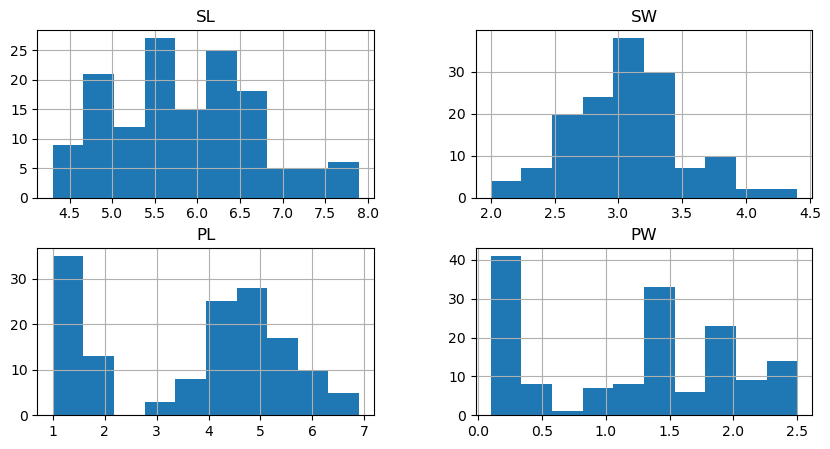

In [102]:
freqgraph=data.select_dtypes(include=['float64'])
freqgraph.hist(figsize=(10,5))
plt.show()

#The distribution for all the columns are Right Skewed

In [11]:
#We have to replace the null values with median for the coulmns 'SL', 'SW', 'PL'

In [103]:
for col in ['SL', 'SW', 'PL']:
    data[col]=data[col].fillna(data[col].median())
data.isna().sum()    

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

#  b) Outlier detection

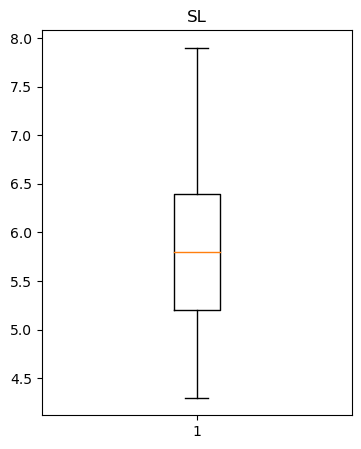

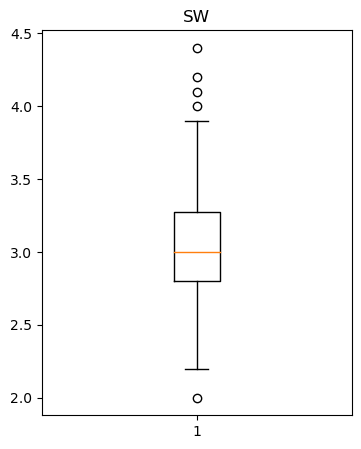

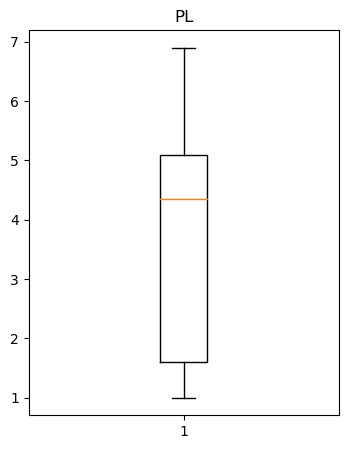

In [104]:
for i in ['SL', 'SW', 'PL']:
    plt.figure(figsize=(4,5))
    plt.boxplot(data[i])
    plt.title(i)

In [26]:
#The outlier is detected in the 'SW' column.So we have to remove the outlier from the 'SW' column.

In [105]:
#Finding the Q1,Q2,Q3

Q1=np.percentile(data['SW'],25,interpolation='midpoint')
Q2=np.percentile(data['SW'],50,interpolation='midpoint')
Q3=np.percentile(data['SW'],75,interpolation='midpoint')
print(Q1,Q2,Q3)

2.8 3.0 3.25


In [106]:
#Finding the median

data['SW'].median()

3.0

In [107]:
#Finding the IQR

IQR=Q3-Q1

low_limit=Q1-1.5*IQR
up_limit=Q3+1.5*IQR

print(low_limit,up_limit)

outlier=[]
for x in data['SW']:
    if (x>up_limit) or (x<low_limit):
        outlier.append(x)
print(outlier)        

2.1249999999999996 3.9250000000000003
[4.0, 4.4, 4.1, 4.2, 2.0]


In [108]:
#Finding the index of the outlier less than lower limit

ind1=data['SW']<low_limit
data.loc[ind1].index

Int64Index([60], dtype='int64')

In [109]:
# Dropping the index of the outlier

data=data.drop([60])

In [110]:
#Finding the index of the outlier greater than upper limit

ind1=data['SW']>up_limit
data.loc[ind1].index

Int64Index([14, 15, 32, 33], dtype='int64')

In [111]:
# Dropping the index of the outlier

data=data.drop([14, 15, 32, 33])

In [112]:
#Rechecking whether there is any outlier present in 'SW' column

ind1=data['SW']>up_limit
ind2=data['SW']<low_limit
print(data.loc[ind1].index)
print(data.loc[ind2].index)

Int64Index([], dtype='int64')
Int64Index([], dtype='int64')


In [50]:
#From the above result it is clear that there are no outlier present in the 'SW' column as all the outliers are removed.

In [113]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [114]:
#Defining the feature and target column
#Label Encoding the 'Classification' column
y=le.fit_transform(data['Classification'])
x=data.drop('Classification',axis=1)


In [115]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Logistic Regression

In [116]:
from sklearn.linear_model import LogisticRegression
warnings.simplefilter("ignore")
clf=LogisticRegression()
model=clf.fit(x_train,y_train)


In [117]:
y_pred=model.predict(x_test)

In [118]:
#Evaluating the Logistic model
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy=',accuracy_score(y_test,y_pred))
print('Precision=',precision_score(y_test,y_pred,average='macro'))
print('Recall=',recall_score(y_test,y_pred,average='macro'))
print('f1 score=',f1_score(y_test,y_pred,average='macro'))

Accuracy= 0.9310344827586207
Precision= 0.9326599326599326
Recall= 0.9326599326599326
f1 score= 0.9326599326599326


In [119]:
confusion_matrix(y_test,y_pred)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

# kNN

In [120]:
from sklearn.neighbors import KNeighborsClassifier
warnings.simplefilter("ignore")
metric_k=[]
neighbors=np.arange(3,15)

#Here we are finding the set of accuracy values, and storing it to a list metric_k, for values of k ranging from 3 to 15
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model=classifier.fit(x_train,y_train)
    y_pred_k=model.predict(x_test)
    acc=accuracy_score(y_test,y_pred_k)
    metric_k.append(acc)
metric_k    

[0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.896551724137931,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.9310344827586207,
 0.8620689655172413]

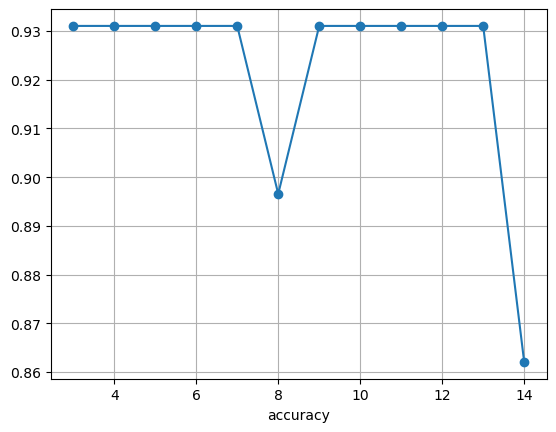

In [121]:
#Plot the metric_k values to get the value of k having the maximum accuracy
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k value')
plt.xlabel('accuracy')
plt.grid()

In [122]:
warnings.simplefilter("ignore")
#Here we are using the n_neighbors as 4 as this value of k have maximum accuracy
classifier=KNeighborsClassifier(n_neighbors=4,metric='minkowski',p=2)
model=classifier.fit(x_train,y_train)
y_pred_k=model.predict(x_test)
acc=accuracy_score(y_test,y_pred_k)

In [123]:
#Evaluating the kNN model for k=4
print('Accuracy=',accuracy_score(y_test,y_pred_k))
print('Precision=',precision_score(y_test,y_pred_k,average='macro'))
print('Recall=',recall_score(y_test,y_pred_k,average='macro'))
print('f1 score=',f1_score(y_test,y_pred_k,average='macro'))

Accuracy= 0.9310344827586207
Precision= 0.9326599326599326
Recall= 0.9326599326599326
f1 score= 0.9326599326599326


In [124]:
confusion_matrix(y_test,y_pred_k)

array([[ 9,  0,  0],
       [ 0,  8,  1],
       [ 0,  1, 10]], dtype=int64)

# SVM

In [125]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [126]:
y_pred_svm=svmclf.predict(x_test)

#Evaluating the SVM-linear model
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
print('f1 score=',f1_score(y_test,y_pred_svm,average='macro'))
print(confusion_matrix(y_test,y_pred_svm))

Accuracy= 0.896551724137931
f1 score= 0.899749373433584
[[9 0 0]
 [0 8 1]
 [0 2 9]]


In [127]:
svmclf=SVC(kernel='rbf')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)

#Evaluating the SVM-rbf model
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
print('f1 score=',f1_score(y_test,y_pred_svm,average='macro'))
print(confusion_matrix(y_test,y_pred_svm))

Accuracy= 0.8620689655172413
f1 score= 0.8666666666666666
[[9 0 0]
 [0 8 1]
 [0 3 8]]


In [128]:
svmclf=SVC(kernel='poly')
svmclf.fit(x_train,y_train)
y_pred_svm=svmclf.predict(x_test)

#Evaluating the SVM-polynomial model
print('Accuracy=',accuracy_score(y_test,y_pred_svm))
print('f1 score=',f1_score(y_test,y_pred_svm,average='macro'))
print(confusion_matrix(y_test,y_pred_svm))

Accuracy= 0.9655172413793104
f1 score= 0.9658994032395567
[[ 9  0  0]
 [ 0  8  1]
 [ 0  0 11]]


# Decision Tree

In [129]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier(random_state=42)
dt_clf.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

In [130]:
y_pred_dt=dt_clf.predict(x_test)

#Evaluating the Decision Tree model
print('Accuracy=',accuracy_score(y_test,y_pred_dt))
print('f1 score=',f1_score(y_test,y_pred_dt,average='macro'))
print(confusion_matrix(y_test,y_pred_dt))

Accuracy= 0.896551724137931
f1 score= 0.899749373433584
[[9 0 0]
 [0 8 1]
 [0 2 9]]


# Random Forest Classifier

In [131]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier(n_estimators=50)
rf_clf.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50)

In [132]:
y_pred_rf=rf_clf.predict(x_test)

#Evaluating the Random Forest model
print('Accuracy=',accuracy_score(y_test,y_pred_rf))
print('f1 score=',f1_score(y_test,y_pred_rf,average='macro'))
print(confusion_matrix(y_test,y_pred_rf))


Accuracy= 0.9310344827586207
f1 score= 0.9326599326599326
[[ 9  0  0]
 [ 0  8  1]
 [ 0  1 10]]


In [154]:
#Considering the f1 score,Logistic and kNN have 93%,SVM(linear-89%,rbf=86%,poly=96%),Decision Tree has 89%,Random Forest has 93%.
#Considering the Accuracy,Logistic and kNN have 93%,SVM(linear-89%,rbf=86%,poly=96%),Decision Tree has 89%,Random Forest has 93%.

#From the above models,SVM-polynomial model is the best model.